<a href="https://colab.research.google.com/github/mateusbissani/TrabNaoSupervisionado/blob/main/TrabNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_fila = pd.read_csv('/content/drive/MyDrive/Data Science/2020-11-03_FILA_-_Base De Dados.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
df_fila.head()

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote
0,1,30/12/86,07/2021,Mulher,FAIXA 3 (mais de 3275),NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES,Campo Largo,03/11/20 10:28
1,2,26/04/88,07/2021,Mulher,FAIXA 1 (menos de 1600),Campo Comprido,Curitiba,03/11/20 10:28
2,3,17/05/88,04/2021,Mulher,FAIXA 2 (entre 1600 e 3275),Cidade Industrial,Curitiba,03/11/20 10:28
3,4,12/07/90,01/2021,Nenhum critério atingido,FAIXA 3 (mais de 3275),Cidade Industrial,Curitiba,03/11/20 10:28
4,5,03/07/89,04/2020,Mulher,FAIXA 1 (menos de 1600),Capão da Imbuia,Curitiba,03/11/20 10:28


In [ ]:
df_fila.describe(include='all')

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote
count,41775.000000,41775,41775,41775,41775,40683,41750,41775
unique,NaN,4712,78,50,3,417,20,1
top,NaN,10/02/17,01/2021,Mulher,FAIXA 2 (entre 1600 e 3275),Cidade Industrial,Curitiba,03/11/20 10:28
freq,NaN,298,4414,10778,18740,5123,37788,41775
mean,20888.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12059.548084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10444.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20888.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,31331.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_fila.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 41775 non-null  int64 
 1   data_inscricao     41775 non-null  object
 2   data_validade      41775 non-null  object
 3   condicao_especial  41775 non-null  object
 4   faixa_renda        41775 non-null  object
 5   bairro             40683 non-null  object
 6   cidade             41750 non-null  object
 7   data_lote          41775 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
df_fila.shape

(41775, 8)

###->Análise e Limpeza dos Dados

#####Eliminando linhas com valores nulos

In [ ]:
df_fila = df_fila.dropna()

In [ ]:
df_fila.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40680 entries, 0 to 41774
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 40680 non-null  int64 
 1   data_inscricao     40680 non-null  object
 2   data_validade      40680 non-null  object
 3   condicao_especial  40680 non-null  object
 4   faixa_renda        40680 non-null  object
 5   bairro             40680 non-null  object
 6   cidade             40680 non-null  object
 7   data_lote          40680 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


#####Transformações são necessárias caso haja variáveis categóricas (textos).

In [ ]:
#Vamos substituir os valores da coluna condicao_especial por números

#'Mulher': 0, 'Nenhum critério atingido':1,'Mulher, Vulnerável, Aluguel':2, 'Mulher, PCD':3, 'Mulher, Aluguel':4,
#'Aluguel':5, 'Mulher, Até 3 filhos menores, Aluguel':6,'Mulher, Vulnerável, Aluguel, PCD':7, 'Mulher, Até 3 filhos menores':8,
#'Até 3 filhos menores':9,'Mulher, Até 3 filhos menores, Aluguel, PCD':10,'Até 3 filhos menores, Aluguel':11, 'Mulher, Aluguel, PCD':12, 'PCD':13,
#'Mulher, Vulnerável':14, 'Aluguel, PCD':15, 'Até 3 filhos menores, PCD':16,'Mulher, Vulnerável, Até 3 filhos menores, Aluguel':17,
#'Mulher, Até 3 filhos menores, PCD':18, 'Vulnerável, PCD':19,'Área de Risco, Mulher, Vulnerável':20,'Mulher, Vulnerável, Até 3 filhos menores':21,
#'Até 3 filhos menores, Aluguel, PCD':22,'Área de Risco, Mulher, Até 3 filhos menores':23,'Área de Risco, Mulher, Vulnerável, Aluguel':24,
#'Área de Risco, Mulher, Aluguel':25, 'Mulher, Vulnerável, PCD':26,'Mulher, Vulnerável, Até 3 filhos menores, Aluguel, PCD':27,
#'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, Aluguel':28,'Vulnerável':29,'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores':30,
#'Área de Risco, Mulher, Até 3 filhos menores, Aluguel':31,'Vulnerável, Até 3 filhos menores':32,'Área de Risco, Vulnerável, Aluguel, PCD':33,
#'Área de Risco':34,'Área de Risco, Vulnerável, Aluguel':35,'Mulher, Vulnerável, Até 3 filhos menores, PCD':36,
#'Área de Risco, Mulher, Vulnerável, Aluguel, PCD':37,'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, Aluguel, PCD':38,'Vulnerável, Aluguel, PCD':39,
#'Área de Risco, Mulher':40,'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, PCD':41,'Vulnerável, Até 3 filhos menores, Aluguel, PCD':42,
#'Área de Risco, Mulher, Vulnerável, PCD':43,'Área de Risco, Mulher, Até 3 filhos menores, Aluguel, PCD':44,'Área de Risco, Vulnerável, Até 3 filhos menores':45,
#'Vulnerável, Aluguel':46, 'Vulnerável, Até 3 filhos menores, Aluguel':47,'Área de Risco, Mulher, Até 3 filhos menores, PCD':48,'Área de Risco, Vulnerável':49

In [ ]:
df_fila['condicao_especial'].replace({'Mulher': 0, 'Nenhum critério atingido':1,
       'Mulher, Vulnerável, Aluguel':2, 'Mulher, PCD':3, 'Mulher, Aluguel':4,
       'Aluguel':5, 'Mulher, Até 3 filhos menores, Aluguel':6,
       'Mulher, Vulnerável, Aluguel, PCD':7, 'Mulher, Até 3 filhos menores':8,
       'Até 3 filhos menores':9,
       'Mulher, Até 3 filhos menores, Aluguel, PCD':10,
       'Até 3 filhos menores, Aluguel':11, 'Mulher, Aluguel, PCD':12, 'PCD':13,
       'Mulher, Vulnerável':14, 'Aluguel, PCD':15, 'Até 3 filhos menores, PCD':16,
       'Mulher, Vulnerável, Até 3 filhos menores, Aluguel':17,
       'Mulher, Até 3 filhos menores, PCD':18, 'Vulnerável, PCD':19,
       'Área de Risco, Mulher, Vulnerável':20,
       'Mulher, Vulnerável, Até 3 filhos menores':21,
       'Até 3 filhos menores, Aluguel, PCD':22,
       'Área de Risco, Mulher, Até 3 filhos menores':23,
       'Área de Risco, Mulher, Vulnerável, Aluguel':24,
       'Área de Risco, Mulher, Aluguel':25, 'Mulher, Vulnerável, PCD':26,
       'Mulher, Vulnerável, Até 3 filhos menores, Aluguel, PCD':27,
       'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, Aluguel':28,
       'Vulnerável':29,
       'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores':30,
       'Área de Risco, Mulher, Até 3 filhos menores, Aluguel':31,
       'Vulnerável, Até 3 filhos menores':32,
       'Área de Risco, Vulnerável, Aluguel, PCD':33, 'Área de Risco':34,
       'Área de Risco, Vulnerável, Aluguel':35,
       'Mulher, Vulnerável, Até 3 filhos menores, PCD':36,
       'Área de Risco, Mulher, Vulnerável, Aluguel, PCD':37,
       'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, Aluguel, PCD':38,
       'Vulnerável, Aluguel, PCD':39, 'Área de Risco, Mulher':40,
       'Área de Risco, Mulher, Vulnerável, Até 3 filhos menores, PCD':41,
       'Vulnerável, Até 3 filhos menores, Aluguel, PCD':42,
       'Área de Risco, Mulher, Vulnerável, PCD':43,
       'Área de Risco, Mulher, Até 3 filhos menores, Aluguel, PCD':44,
       'Área de Risco, Vulnerável, Até 3 filhos menores':45,
       'Vulnerável, Aluguel':46, 'Vulnerável, Até 3 filhos menores, Aluguel':47,
       'Área de Risco, Mulher, Até 3 filhos menores, PCD':48,
       'Área de Risco, Vulnerável':49}, inplace=True)

In [ ]:
#Vamos substituir os valores da coluna faixa_renda por números

#FAIXA 1 (menos de 1600):0, FAIXA 2 (entre 1600 e 3275):1, FAIXA 3 (mais de 3275):2,
df_fila['faixa_renda'].replace({'FAIXA 1 (menos de 1600)':0, 'FAIXA 2 (entre 1600 e 3275)':1, 'FAIXA 3 (mais de 3275)':2}, inplace=True)

In [ ]:
#Vamos substituir os valores da coluna cidade por números
#'Campo Largo':0, 'Curitiba':1, 'Fazenda Rio Grande':2,'São José dos Pinhais':3, 'Piraquara':4, 'Pinhais':5, 'Colombo':6,
#'Araucária':7, 'Campo Magro':8, 'Contenda':9, 'Paranaguá':10,'Quatro Barras':11, 'Campina Grande do Sul':12, 'Almirante Tamandaré':13,
#'Lapa':14, 'Bocaiúva do Sul':15, 'Itaperuçu':16, 'Mandirituba':17,'Balsa Nova':18, 'Rio Branco do Sul':19

In [ ]:
df_fila['cidade'].replace({'Campo Largo':0, 'Curitiba':1, 'Fazenda Rio Grande':2,
       'São José dos Pinhais':3, 'Piraquara':4, 'Pinhais':5, 'Colombo':6,
       'Araucária':7, 'Campo Magro':8, 'Contenda':9, 'Paranaguá':10,
       'Quatro Barras':11, 'Campina Grande do Sul':12, 'Almirante Tamandaré':13,
       'Lapa':14, 'Bocaiúva do Sul':15, 'Itaperuçu':16, 'Mandirituba':17,
       'Balsa Nova':18, 'Rio Branco do Sul':19}, inplace=True)

In [ ]:
df_fila.head()

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote
0,1,30/12/86,07/2021,0,2,NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES,0,03/11/20 10:28
1,2,26/04/88,07/2021,0,0,Campo Comprido,1,03/11/20 10:28
2,3,17/05/88,04/2021,0,1,Cidade Industrial,1,03/11/20 10:28
3,4,12/07/90,01/2021,1,2,Cidade Industrial,1,03/11/20 10:28
4,5,03/07/89,04/2020,0,0,Capão da Imbuia,1,03/11/20 10:28


In [ ]:
df_filaa = df_fila.drop(columns = ['id', 'data_validade','data_inscricao','bairro','data_lote'])
df_fila.head()

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote
0,1,30/12/86,07/2021,0,2,NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES,0,03/11/20 10:28
1,2,26/04/88,07/2021,0,0,Campo Comprido,1,03/11/20 10:28
2,3,17/05/88,04/2021,0,1,Cidade Industrial,1,03/11/20 10:28
3,4,12/07/90,01/2021,1,2,Cidade Industrial,1,03/11/20 10:28
4,5,03/07/89,04/2020,0,0,Capão da Imbuia,1,03/11/20 10:28


In [ ]:
df_filaa.head()

,condicao_especial,faixa_renda,cidade
0,0,2,0
1,0,0,1
2,0,1,1
3,1,2,1
4,0,0,1


###->Escalonamento

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()

In [ ]:
df_filaa_esc = escala.fit_transform(df_filaa)

In [ ]:
df_filaa_esc

array([[-1.00586169,  1.8735382 , -0.86029928],
       [-1.00586169, -1.04190568, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       ...,
       [-0.77928842,  0.41581626, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       [-0.77928842, -1.04190568,  0.40996222]])

###->K Means com PCA

In [ ]:
df_filaa_esc

array([[-1.00586169,  1.8735382 , -0.86029928],
       [-1.00586169, -1.04190568, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       ...,
       [-0.77928842,  0.41581626, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       [-0.77928842, -1.04190568,  0.40996222]])

In [ ]:
df_filaa_esc.shape

(40680, 3)

#####Componentes Principais

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df_filaa_pca = pca.fit_transform(df_filaa_esc)

In [ ]:
df_filaa_pca

array([[-1.69852669, -1.27592048],
       [ 0.13972116, -0.52436296],
       [-0.87562595, -0.60587678],
       ...,
       [-0.72826006, -0.52163727],
       [-0.87562595, -0.60587678],
       [ 0.09464068,  0.14840643]])

In [ ]:
#Razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.35122172, 0.33239898])

In [ ]:
#Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.6836207009882859

#####Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_filaa_pca)
#Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

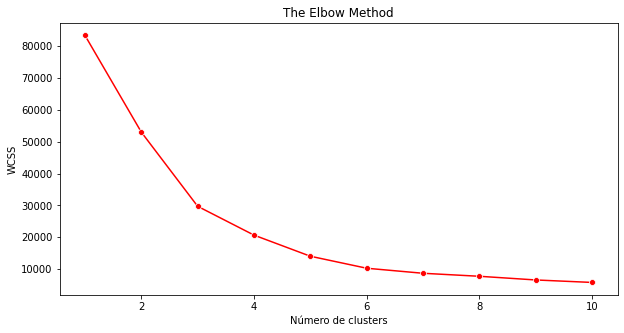

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

#####Agrupamento

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [ ]:
kmeans_fit = kmeans.fit(df_filaa_pca)

In [ ]:
#Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 1.41452495,  0.28993496],
       [-1.0252196 , -0.45442426],
       [ 0.16601062, -0.21799632],
       [-1.27016707,  3.64716779]])

In [ ]:
#Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
classificacao[2]

1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = df_filaa_pca[:,0], y = df_filaa_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

###->Agrupamento Hierárquico com PCA


In [ ]:
df_filaa_esc

array([[-1.00586169,  1.8735382 , -0.86029928],
       [-1.00586169, -1.04190568, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       ...,
       [-0.77928842,  0.41581626, -0.22516853],
       [-1.00586169,  0.41581626, -0.22516853],
       [-0.77928842, -1.04190568,  0.40996222]])

In [ ]:
df_filaa.shape

(40680, 3)

#####Componentes Principais

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df_filaa_pca = pca.fit_transform(df_filaa_esc)

In [ ]:
df_filaa_pca

array([[-1.69852669, -1.27592048],
       [ 0.13972116, -0.52436296],
       [-0.87562595, -0.60587678],
       ...,
       [-0.72826006, -0.52163727],
       [-0.87562595, -0.60587678],
       [ 0.09464068,  0.14840643]])

In [ ]:
#Razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.35122172, 0.33239898])

In [ ]:
#Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.6836207009882873

#####Dendograma

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_pca, method = 'ward')) #complete, single e ward (dados dispersos)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao = hier.fit_predict(df_filaa_pca)

In [ ]:
classificacao

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df_filaa_pca[:,0], y = df_filaa_pca[:,1], color=classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

#####Agrupamento

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,2
2,1
3,1
4,2
...,...
40675,2
40676,3
40677,1
40678,1


In [ ]:
df_hc = pd.concat([df_fila, agrupamento],axis=1)
df_hc

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote,Grupo
0,1.0,30/12/86,07/2021,0.0,2.0,NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES,0.0,03/11/20 10:28,1.0
1,2.0,26/04/88,07/2021,0.0,0.0,Campo Comprido,1.0,03/11/20 10:28,2.0
2,3.0,17/05/88,04/2021,0.0,1.0,Cidade Industrial,1.0,03/11/20 10:28,1.0
3,4.0,12/07/90,01/2021,1.0,2.0,Cidade Industrial,1.0,03/11/20 10:28,1.0
4,5.0,03/07/89,04/2020,0.0,0.0,Capão da Imbuia,1.0,03/11/20 10:28,2.0
...,...,...,...,...,...,...,...,...,...
41770,41771.0,29/10/20,10/2021,0.0,0.0,Cidade Industrial,1.0,03/11/20 10:28,NaN
41771,41772.0,03/11/20,11/2021,8.0,2.0,PLANTA BAIRRO WEISSÓPOLIS,5.0,03/11/20 10:28,NaN
41772,41773.0,03/11/20,11/2021,1.0,1.0,Capão Raso,1.0,03/11/20 10:28,NaN
41773,41774.0,03/11/20,11/2021,0.0,1.0,Pinheirinho,1.0,03/11/20 10:28,NaN


In [ ]:
grupo2 = df_hc.loc[df_hc.Grupo == 3]
grupo2 

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote,Grupo
31,32.0,04/05/92,06/2021,4.0,1.0,Centro,5.0,03/11/20 10:28,3.0
32,33.0,19/05/92,10/2020,4.0,1.0,JARDIM RIO VERDE,6.0,03/11/20 10:28,3.0
61,62.0,26/11/93,11/2020,5.0,1.0,Umbará,1.0,03/11/20 10:28,3.0
84,85.0,15/09/94,04/2020,0.0,1.0,Capão da Imbuia,1.0,03/11/20 10:28,3.0
90,91.0,13/10/94,09/2021,0.0,2.0,Portão,1.0,03/11/20 10:28,3.0
...,...,...,...,...,...,...,...,...,...
40574,40575.0,20/08/20,08/2021,8.0,0.0,Sítio Cercado,1.0,03/11/20 10:28,3.0
40596,40597.0,23/08/20,08/2021,0.0,0.0,Novo Mundo,1.0,03/11/20 10:28,3.0
40603,40604.0,24/08/20,08/2021,0.0,1.0,Cidade Industrial,1.0,03/11/20 10:28,3.0
40660,40661.0,26/08/20,09/2021,0.0,0.0,Portão,1.0,03/11/20 10:28,3.0


###Obs.:Prof não consegui rodar o Dendograma, faltou Memória RAM, acredito que seja pelo fato do dataset conter muitas linhas.

In [ ]:
#Conclusão

##Conclusão
Prof, sendo 100% honesto, tive dificuldade para analisar os gráficos e tirar uma conclusão, mas sendo um dataset do COHAB e se tratando dos dados que eu analisei durante a construção dos algoritmos, o resultado está relacionado a alocação de pessoas vulneráveis, com o objetivo de oferecer moradia à elas, neste caso, analisando as variáveis que utilizei, a conclusão mira em quais cidades se encontram a maioria destas pessoas, suas faixas de renda e por fim, a correlação entre elas.

Peço desculpas a professora pelos acontecimentos do primeiro envio desta atividade e espero ter feito pelo menos, um bom trabalho.